# Проект

Подгрузим необходимые библиотеки и файл для анализа

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

stud_math = pd.read_csv('stud_math.csv')
display(stud_math.head(10))
stud_math.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Рассмотрим какие столбцы в базе.

In [2]:
stud_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

Переименуем столбцы для единообразия и понятности.

In [3]:
stud_math.columns = ['school', 'sex', 'age', 'address', 'fam_size', 'par_status', 'm_edu', 'f_edu',
       'm_job', 'f_job', 'reason', 'guardian', 'travel_time', 'study_time',
       'failures', 'school_sup', 'fam_sup', 'paid', 'activities', 'nursery',
       'study_time_granular', 'higher', 'internet', 'romantic', 'fam_rel',
       'free_time', 'go_out', 'health', 'absences', 'score']

Проведем общие действия по проверке данных:
по проверке на дубликаты.

In [4]:
if len(stud_math[stud_math.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(stud_math[stud_math.duplicated()]))
    print(stud_math[stud_math.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


По корреляции данных на наличие столбцов с одинаковой информацией.

In [5]:
stud_math.corr()

,age,m_edu,f_edu,travel_time,study_time,failures,study_time_granular,fam_rel,free_time,go_out,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
m_edu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
f_edu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
travel_time,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
study_time,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
study_time_granular,0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
fam_rel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
free_time,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
go_out,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


Видим, что столбцы study_time и study_time_granular коррелируются на 100%. Удаляем один из столбцов.

In [6]:
stud_math.drop(['study_time_granular'], inplace = True, axis = 1)

По заполненности столбцов данными.

In [7]:
stud_math.describe()

,age,m_edu,f_edu,travel_time,study_time,failures,fam_rel,free_time,go_out,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [8]:
stud_math.describe(include = [object])

,school,sex,address,fam_size,par_status,m_job,f_job,reason,guardian,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


Видим, что данные в столбцах не полные. Будем учитывать это в дальнейшем анализе
Рассмотрим каждый столбец с данными отдельно.

Функция оценки данных  
1.Уникальных значений  
2.Значений встречающихся более 10 раз  
3.Количество пустых строк  
4.Счет количества значений по видам  

In [9]:
def data_evaluation(name):
    
    unique= stud_math[name].value_counts().count()  # Счет уникальных значений
    unique = str(unique)   
    
    stud_math[name] = stud_math[name].astype(str).apply(lambda x: None if x.strip()=='' else x)
    null_count = stud_math[name][stud_math[name] == 'nan'].count()  # Счет пустых строк
    null_count = str(null_count)
        
    freq = ("Значений, встретившихся в столбце более 10 раз:" , (stud_math[name].value_counts()>10).sum()) 
    
    val_c = stud_math[name].value_counts()  # Применяем функцию для группировки
    
    return "Пустых строк " + null_count, "Количество уникальных значений " +unique, freq , val_c 

Начнем рассмотрение столбцов

# 0.school  
аббревиатура школы, в которой учится ученик

In [10]:
data_evaluation('school')

('Пустых строк 0',
 'Количество уникальных значений 2',
 ('Значений, встретившихся в столбце более 10 раз:', 2),
 GP    349
 MS     46
 Name: school, dtype: int64)

# 1.sex  
пол ученика ('F' - женский, 'M' - мужской)

In [11]:
data_evaluation('sex')

('Пустых строк 0',
 'Количество уникальных значений 2',
 ('Значений, встретившихся в столбце более 10 раз:', 2),
 F    208
 M    187
 Name: sex, dtype: int64)

# 2.age  
возраст ученика (от 15 до 22)

In [12]:
data_evaluation('age')

('Пустых строк 0',
 'Количество уникальных значений 8',
 ('Значений, встретившихся в столбце более 10 раз:', 5),
 16    104
 17     98
 15     82
 18     82
 19     24
 20      3
 22      1
 21      1
 Name: age, dtype: int64)

Возраст - это количественная переменная.Отрисуем грифик по данной переменной и найдем статистические выбросы.

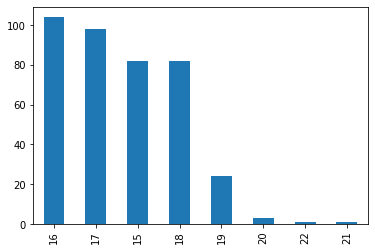

In [13]:
stud_math.age.value_counts().plot(kind='bar')

In [14]:
stud_math.age = stud_math.age.astype(float)
median = stud_math.age.median()
IQR = stud_math.age.quantile(0.75) - stud_math.age.quantile(0.25)
perc25 = stud_math.age.quantile(0.25)
perc75 = stud_math.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


Большинство учеников имеют возраст 15-18 лет.  
Выбросом предлагается рассматривать возраст свыше 21 года. В дальнейшем при построении модели рассмотрим возможность удаления этих данных.  

# 3.address  
тип адреса ученика ('U' - городской, 'R' - за городом)

In [15]:
data_evaluation('address')

('Пустых строк 17',
 'Количество уникальных значений 2',
 ('Значений, встретившихся в столбце более 10 раз:', 3),
 U      295
 R       83
 nan     17
 Name: address, dtype: int64)

Большинство учеников городские.  
Заменяем пустые значения на популярное значение в столбце "U"

In [16]:
stud_math.address = stud_math.address.replace('nan', 'U')  # Заменяем пустые строки на самое популярное значение U
pd.DataFrame(stud_math.address.value_counts())

,address
U,312
R,83


# 4.fam_size  
размер семьи('LE3' <= 3, 'GT3' >3)

In [17]:
data_evaluation('fam_size')

('Пустых строк 27',
 'Количество уникальных значений 2',
 ('Значений, встретившихся в столбце более 10 раз:', 3),
 GT3    261
 LE3    107
 nan     27
 Name: fam_size, dtype: int64)

Большинство учеников проживают семье с численностью более 3.  
Заменяем пустые значения на популярное значение в столбце GT3.

In [18]:
stud_math.fam_size = stud_math.fam_size.replace('nan', 'GT3') 
pd.DataFrame(stud_math.fam_size.value_counts())

,fam_size
GT3,288
LE3,107


# 5.par_status  
статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [19]:
data_evaluation('par_status')

('Пустых строк 45',
 'Количество уникальных значений 2',
 ('Значений, встретившихся в столбце более 10 раз:', 3),
 T      314
 nan     45
 A       36
 Name: par_status, dtype: int64)

Большинство учеников живут в полных семьях.  
Нет возможности понять совместно ли живут родители учащегося. Добавляем поле No answer.  
Количество уникальных значений становится 3.

In [20]:
stud_math.par_status = stud_math.par_status.replace('nan', 'No answer') 
pd.DataFrame(stud_math.par_status.value_counts())

,par_status
T,314
No answer,45
A,36


# 6.m_edu  
образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [22]:
data_evaluation('m_edu')

('Пустых строк 3',
 'Количество уникальных значений 6',
 ('Значений, встретившихся в столбце более 10 раз:', 4),
 4.0    131
 2.0    102
 3.0     97
 1.0     59
 nan      3
 0.0      3
 Name: m_edu, dtype: int64)

Большинство мам имеют образование.  
Нет 3х ответов. Заменяем на медиану.  
Поменяем формат с float на object.

In [23]:
stud_math.m_edu = stud_math.m_edu.replace('nan', stud_math.m_edu.median())  # Заменяем пустые строки на медиану
stud_math.m_edu = stud_math.m_edu.astype(object)  # Меняем формат
stud_math.m_edu = stud_math.m_edu.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(stud_math.m_edu.value_counts())

,m_edu
4.0,131
2.0,102
3.0,100
1.0,59
0.0,3


# 7.f_edu  
образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [24]:
data_evaluation('f_edu')

('Пустых строк 24',
 'Количество уникальных значений 6',
 ('Значений, встретившихся в столбце более 10 раз:', 5),
 2.0     106
 3.0      96
 4.0      88
 1.0      78
 nan      24
 0.0       2
 40.0      1
 Name: f_edu, dtype: int64)

Большинство пап имеют образование.  
Значение 40 - явная ошибка заполнения. Заменяем её на 4.  
Нет ответа по 24 строкам. Заменяем пустые строки на медиану.  
Поменяем формат с float на object.  
Количество уникальных значений 5.

In [25]:
stud_math.f_edu = stud_math.f_edu.replace('40.0', 4.0) #заменяем опечатку на верное число
stud_math.f_edu = stud_math.f_edu.replace('nan', stud_math.f_edu.median()) #заменяем пустые строки на медиану
stud_math.f_edu = stud_math.f_edu.astype(str).apply(lambda x: None if x.strip() == '' else x)
stud_math.f_edu = stud_math.f_edu.astype(object) #меняем формат
pd.DataFrame(stud_math.f_edu.value_counts())

,f_edu
2.0,130
3.0,96
4.0,89
1.0,78
0.0,2


# 8.m_job  
работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [26]:
data_evaluation('m_job')

('Пустых строк 19',
 'Количество уникальных значений 5',
 ('Значений, встретившихся в столбце более 10 раз:', 6),
 other       133
 services     98
 at_home      58
 teacher      55
 health       32
 nan          19
 Name: m_job, dtype: int64)

Матери занимаются разнообразной работой. Самый распространенный вид services.  
Пустых строк 19.  
Переводим эти строки в other, потому что мы не знаем какой конкретно работой занимается мамы.

In [27]:
stud_math.m_job = stud_math.m_job.replace('nan', 'other')
pd.DataFrame(stud_math.m_job.value_counts())

,m_job
other,152
services,98
at_home,58
teacher,55
health,32


# 9.f_job  
работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [28]:
data_evaluation('f_job')

('Пустых строк 36',
 'Количество уникальных значений 5',
 ('Значений, встретившихся в столбце более 10 раз:', 6),
 other       197
 services    102
 nan          36
 teacher      29
 at_home      16
 health       15
 Name: f_job, dtype: int64)

Отцы занимаются разнообразной работой. Самый распространенный вид services.  
Пустых строк 36.  
Переводим эти строки в other, потому что мы не знаем какой работой занимается папы.

In [29]:
stud_math.f_job = stud_math.f_job.replace('nan', 'other')
pd.DataFrame(stud_math.f_job.value_counts())

,f_job
other,233
services,102
teacher,29
at_home,16
health,15


# 10.reason 
причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [30]:
data_evaluation('reason')

('Пустых строк 17',
 'Количество уникальных значений 4',
 ('Значений, встретившихся в столбце более 10 раз:', 5),
 course        137
 home          104
 reputation    103
 other          34
 nan            17
 Name: reason, dtype: int64)

Причины выбора школы очень разнообразны.  
Пустых строк 17. Переводим эти строки в other, потому что мы не знаем причину выбора школы.

In [31]:
stud_math.reason = stud_math.reason.replace('nan', 'other')
pd.DataFrame(stud_math.reason.value_counts())

,reason
course,137
home,104
reputation,103
other,51


# 11.guardian  
опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [32]:
data_evaluation('guardian')

('Пустых строк 31',
 'Количество уникальных значений 3',
 ('Значений, встретившихся в столбце более 10 раз:', 4),
 mother    250
 father     86
 nan        31
 other      28
 Name: guardian, dtype: int64)

Опекуны в основном матери.  
Пустых строк 31. Переводим эти строки в other, потому что мы не знаем кто именно опекун.

In [33]:
stud_math.guardian = stud_math.guardian.replace('nan', 'other')
pd.DataFrame(stud_math.guardian.value_counts())

,guardian
mother,250
father,86
other,59


# 12.travel_time  
время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [34]:
data_evaluation('travel_time')

('Пустых строк 28',
 'Количество уникальных значений 4',
 ('Значений, встретившихся в столбце более 10 раз:', 4),
 1.0    242
 2.0     96
 nan     28
 3.0     22
 4.0      7
 Name: travel_time, dtype: int64)

Большинство учеников добираются до школы менее 15 минут.  
Пустых строк 28. Заполняем строки медианой.

In [35]:
stud_math.travel_time = stud_math.travel_time.replace('nan', stud_math.travel_time.median())
stud_math.travel_time = stud_math.travel_time.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(stud_math.travel_time.value_counts())

,travel_time
1.0,270
2.0,96
3.0,22
4.0,7


# 13.study_time  
время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [36]:
data_evaluation('study_time')

('Пустых строк 7',
 'Количество уникальных значений 4',
 ('Значений, встретившихся в столбце более 10 раз:', 4),
 2.0    194
 1.0    103
 3.0     64
 4.0     27
 nan      7
 Name: study_time, dtype: int64)

Большинство учеников учатся еще от 2-5 часов в неделю.  
Пустых строк 7. Заполняем строки медианой.

In [37]:
stud_math.study_time = stud_math.study_time.replace('nan', stud_math.study_time.median())
stud_math.study_time = stud_math.study_time.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(stud_math.study_time.value_counts())

,study_time
2.0,201
1.0,103
3.0,64
4.0,27


# 14.failures  
количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [38]:
data_evaluation('failures')

('Пустых строк 22',
 'Количество уникальных значений 4',
 ('Значений, встретившихся в столбце более 10 раз:', 5),
 0.0    293
 1.0     49
 nan     22
 2.0     16
 3.0     15
 Name: failures, dtype: int64)

Большинство учеников не имеют внеучебных неудач.  
Пустых строк 22. Заполняем самым популярным значением.

In [39]:
stud_math.failures = stud_math.failures.replace('nan', '0.0')
stud_math.failures = stud_math.failures.astype(object)
stud_math.failures = stud_math.failures.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(stud_math.failures.value_counts())

,failures
0.0,315
1.0,49
2.0,16
3.0,15


# 15.school_sup  
дополнительная образовательная поддержка (yes или no)

In [40]:
data_evaluation('school_sup')

('Пустых строк 9',
 'Количество уникальных значений 2',
 ('Значений, встретившихся в столбце более 10 раз:', 2),
 no     335
 yes     51
 nan      9
 Name: school_sup, dtype: int64)

Большинство учеников не имеют доп поддержки учебной.  
Пустых строк 9. Заполняем самым популярным значением.

In [41]:
stud_math.school_sup = stud_math.school_sup.replace('nan', 'no')
stud_math.school_sup = stud_math.school_sup.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(stud_math.school_sup.value_counts())

,school_sup
no,344
yes,51


# 16.fam_sup  
семейная образовательная поддержка (yes или no)

In [42]:
data_evaluation('fam_sup')

('Пустых строк 39',
 'Количество уникальных значений 2',
 ('Значений, встретившихся в столбце более 10 раз:', 3),
 yes    219
 no     137
 nan     39
 Name: fam_sup, dtype: int64)

Большинство учеников имеют учебную поддержку семьи.  
Пустых строк 39. Заполняем самым популярным значением.

In [43]:
stud_math.fam_sup = stud_math.fam_sup.replace('nan', 'yes')
stud_math.fam_sup = stud_math.fam_sup.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(stud_math.fam_sup.value_counts())

,fam_sup
yes,258
no,137


# 17.paid  
дополнительные платные занятия по математике (yes или no)

In [44]:
data_evaluation('paid')

('Пустых строк 40',
 'Количество уникальных значений 2',
 ('Значений, встретившихся в столбце более 10 раз:', 3),
 no     200
 yes    155
 nan     40
 Name: paid, dtype: int64)

Распеределение учеников по дополнительным платным занятиям почти поровну.  
Пустых строк 40. Пока оставляем как третий вариант.

In [45]:
stud_math.paid = stud_math.paid.replace('nan', 'no answer')
stud_math.paid = stud_math.paid.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(stud_math.paid.value_counts())

,paid
no,200
yes,155
no answer,40


# 18.activities  
дополнительные внеучебные занятия (yes или no)

In [46]:
data_evaluation('activities')

('Пустых строк 14',
 'Количество уникальных значений 2',
 ('Значений, встретившихся в столбце более 10 раз:', 3),
 yes    195
 no     186
 nan     14
 Name: activities, dtype: int64)

Распеределение учеников по дополнительным внеучебным занятиям почти поровну.  
Пустых строк 14. Пока оставляем как третий вариант.

In [47]:
stud_math.activities = stud_math.activities.replace('nan', 'no answer')
stud_math.activities = stud_math.activities.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(stud_math.activities.value_counts())

,activities
yes,195
no,186
no answer,14


# 19.nursery  
посещал детский сад (yes или no)

In [48]:
data_evaluation('nursery')

('Пустых строк 16',
 'Количество уникальных значений 2',
 ('Значений, встретившихся в столбце более 10 раз:', 3),
 yes    300
 no      79
 nan     16
 Name: nursery, dtype: int64)

Большинство учеников посещали детский сад.  
Пустых строк 16. Заполняем самым популярным значением.

In [49]:
stud_math.nursery = stud_math.nursery.replace('nan', 'yes')
stud_math.nursery = stud_math.nursery.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(stud_math.nursery.value_counts())

,nursery
yes,316
no,79


# 21.higher  
хочет получить высшее образование (yes или no)

In [50]:
data_evaluation('higher')

('Пустых строк 20',
 'Количество уникальных значений 2',
 ('Значений, встретившихся в столбце более 10 раз:', 3),
 yes    356
 nan     20
 no      19
 Name: higher, dtype: int64)

Большинство учеников хотят получить высшее образование.  
Пустых строк 20. Заполняем самым популярным значением.

In [51]:
stud_math.higher = stud_math.higher.replace('nan', 'yes')
stud_math.higher = stud_math.higher.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(stud_math.higher.value_counts())

,higher
yes,376
no,19


# 22.internet  
наличие интернета дома (yes или no)

In [52]:
data_evaluation('internet')

('Пустых строк 34',
 'Количество уникальных значений 2',
 ('Значений, встретившихся в столбце более 10 раз:', 3),
 yes    305
 no      56
 nan     34
 Name: internet, dtype: int64)

Большинство учеников имеют интернет дома.  
Пустых строк 34. Заполняем самым популярным значением.

In [53]:
stud_math.internet = stud_math.internet.replace('nan', 'yes')
stud_math.internet = stud_math.internet.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(stud_math.internet.value_counts())

,internet
yes,339
no,56


# 23.romantic  
в романтических отношениях (yes или no)

In [54]:
data_evaluation('romantic')

('Пустых строк 31',
 'Количество уникальных значений 2',
 ('Значений, встретившихся в столбце более 10 раз:', 3),
 no     240
 yes    124
 nan     31
 Name: romantic, dtype: int64)

Большинство учеников не имеют романтических отношений.  
Пустых строк 31. Пока оставляем как третий вариант.

In [55]:
stud_math.romantic = stud_math.romantic.replace('nan', 'no answer')
stud_math.romantic = stud_math.romantic.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(stud_math.romantic.value_counts())

,romantic
no,240
yes,124
no answer,31


# 24.fam_rel  
семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [56]:
data_evaluation('fam_rel')

('Пустых строк 27',
 'Количество уникальных значений 6',
 ('Значений, встретившихся в столбце более 10 раз:', 5),
 4.0     182
 5.0      99
 3.0      62
 nan      27
 2.0      17
 1.0       7
 -1.0      1
 Name: fam_rel, dtype: int64)

В основном отношения в семье хорошие и очень хорошие.  
Есть ошибка ввода -1. Предполагаем, что это ошибка ввода. Ошибку заменяем на 1.  
27 пустых строк заполняем 4, как самый повторяющийся элемент.

In [57]:
stud_math.fam_rel = stud_math.fam_rel.replace('nan', '4.0')
stud_math.fam_rel = stud_math.fam_rel.replace('-1.0', 1.0)
stud_math.fam_rel = stud_math.fam_rel.astype(str).apply(lambda x: None if x.strip() == '' else x)
stud_math.fam_rel = stud_math.fam_rel.astype(object)
pd.DataFrame(stud_math.fam_rel.value_counts())

,fam_rel
4.0,209
5.0,99
3.0,62
2.0,17
1.0,8


# 25.free_time  
свободное время после школы (от 1 - очень мало до 5 - очень много)

In [58]:
data_evaluation('free_time')

('Пустых строк 11',
 'Количество уникальных значений 5',
 ('Значений, встретившихся в столбце более 10 раз:', 6),
 3.0    153
 4.0    112
 2.0     63
 5.0     38
 1.0     18
 nan     11
 Name: free_time, dtype: int64)

У большинства учеников свободного времени достаточно.  
Пустых строк 11. Заполняем по самому распространенному.

In [59]:
stud_math.free_time = stud_math.free_time.replace('nan', '3.0')
stud_math.free_time = stud_math.free_time.astype(str).apply(lambda x: None if x.strip() == '' else x)
stud_math.free_time = stud_math.free_time.astype(object)
pd.DataFrame(stud_math.free_time.value_counts())

,free_time
3.0,164
4.0,112
2.0,63
5.0,38
1.0,18


# 26.go_out  
проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [60]:
data_evaluation('go_out')

('Пустых строк 8',
 'Количество уникальных значений 5',
 ('Значений, встретившихся в столбце более 10 раз:', 5),
 3.0    127
 2.0    101
 4.0     84
 5.0     52
 1.0     23
 nan      8
 Name: go_out, dtype: int64)

Времени с друзьями школьники проводят достаточно.  
Пустых строк 8. Заполняем по самому распространенному.

In [61]:
stud_math.go_out = stud_math.go_out.replace('nan', '3.0')
stud_math.go_out = stud_math.go_out.astype(str).apply(lambda x: None if x.strip() == '' else x)
stud_math.go_out = stud_math.go_out.astype(object)
pd.DataFrame(stud_math.go_out.value_counts())

,go_out
3.0,135
2.0,101
4.0,84
5.0,52
1.0,23


# 27.health  
текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [62]:
data_evaluation('health')

('Пустых строк 15',
 'Количество уникальных значений 5',
 ('Значений, встретившихся в столбце более 10 раз:', 6),
 5.0    138
 3.0     89
 4.0     63
 1.0     47
 2.0     43
 nan     15
 Name: health, dtype: int64)

Большинство детей здоровы.  
Пустых строк 15. Заполняем по самому распространенному.

In [63]:
stud_math.health = stud_math.health.replace('nan', '5.0')
stud_math.health = stud_math.health.astype(str).apply(lambda x: None if x.strip() == '' else x)
stud_math.health = stud_math.health.astype(object)
pd.DataFrame(stud_math.health.value_counts())

,health
5.0,153
3.0,89
4.0,63
1.0,47
2.0,43


# 28.absences  
количество пропущенных занятий

In [64]:
data_evaluation('absences')

('Пустых строк 12',
 'Количество уникальных значений 36',
 ('Значений, встретившихся в столбце более 10 раз:', 9),
 0.0      111
 2.0       60
 4.0       53
 6.0       31
 8.0       21
 10.0      17
 nan       12
 14.0      12
 12.0      12
 3.0        8
 16.0       7
 7.0        6
 18.0       5
 5.0        5
 20.0       4
 9.0        3
 22.0       3
 1.0        3
 11.0       2
 13.0       2
 15.0       2
 28.0       1
 212.0      1
 40.0       1
 30.0       1
 17.0       1
 26.0       1
 385.0      1
 56.0       1
 54.0       1
 25.0       1
 21.0       1
 19.0       1
 23.0       1
 75.0       1
 24.0       1
 38.0       1
 Name: absences, dtype: int64)

У большинства учеников нет пропущенных занятий.  
Пустых строк 12. Заменяем их на самое встречаемое.  

In [65]:
stud_math.absences = stud_math.absences.replace('nan', 0.0)
stud_math.absences = stud_math.absences.astype(str).apply(lambda x: None if x.strip() == '' else x)
stud_math.absences = stud_math.absences.astype(float)
pd.DataFrame(stud_math.absences.value_counts())

,absences
0.0,123
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


Число пропусков - это количественная переменная.  
Отрисуем грифик по данной переменной и найдем статистические выбросы.

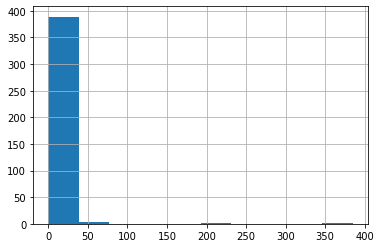

In [66]:
stud_math.absences.hist()

Основные значения сосредоточены в области от 0 до 25.  
Так как значений очень много, и много со значением 1, то есть желание оценить на момент выбросов.

In [67]:
median = stud_math.absences.median()
IQR = stud_math.absences.quantile(0.75) - stud_math.absences.quantile(0.25)
perc25 = stud_math.absences.quantile(0.25)
perc75 = stud_math.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


По стандартной схеме выбросы считаются свыше 20 пропусков. Буду считать выбросами свыше 30. Это 9 значений.  

# 29.score  
баллы по госэкзамену по математике

In [68]:
data_evaluation('score')

('Пустых строк 6',
 'Количество уникальных значений 18',
 ('Значений, встретившихся в столбце более 10 раз:', 12),
 50.0     54
 55.0     46
 0.0      37
 75.0     33
 40.0     31
 60.0     31
 65.0     31
 70.0     27
 45.0     27
 80.0     16
 30.0     15
 90.0     12
 35.0      9
 25.0      7
 nan       6
 85.0      6
 95.0      5
 20.0      1
 100.0     1
 Name: score, dtype: int64)

Пустых строк 6. Удалим строки из базы данных с пустыми результатами, так как цель модели предсказывание оценки.  
37 результатов с оценкой 0. Видимо 37 учеников не пришли на экзамены.

In [69]:
stud_math.drop(stud_math.loc[stud_math['score'] == 'nan'].index, inplace=True)
stud_math.score = stud_math.score.astype(float)

Баллы по гос экзамену - это количественная переменная.  
Отрисуем грифик по данной переменной.

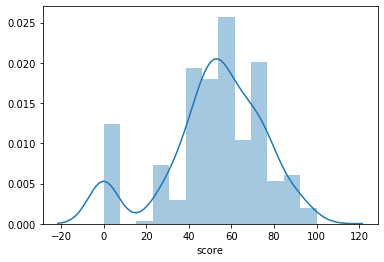

In [70]:
sns_plot = sns.distplot(stud_math['score'])

Повторно посмотрим по всем числовым переменным характеристики.

In [71]:
stud_math.describe()

,age,absences,score
count,389.000000,389.000000,389.000000
mean,16.673522,7.113111,52.262211
std,1.265662,23.310047,22.919022
min,15.000000,0.000000,0.000000
25%,16.000000,0.000000,40.000000
50%,17.000000,4.000000,55.000000
75%,18.000000,8.000000,70.000000
max,22.000000,385.000000,100.000000


От 40 до 70 баллов самое распростратенные набранные баллы.

# Проведем корреляционный анализ по числовым переменным

In [72]:
stud_math.corr()

,age,absences,score
age,1.000000,0.095166,-0.155726
absences,0.095166,1.000000,0.060932
score,-0.155726,0.060932,1.000000


Основываясь на шкале Чеддока получается что корреляция слабая, а в отношении возраста еще и обратная.

# Проанализируем номинативные переменные

Посмотрим, различаются ли распределения баллов в зависимости от значения номинативных переменных.  
Сделаем это с помощью box-plot (график показывает плотность распределения переменных).

In [74]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x = column, y = 'score', 
                data = stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:10])],
               ax = ax)
    plt.xticks(rotation = 45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

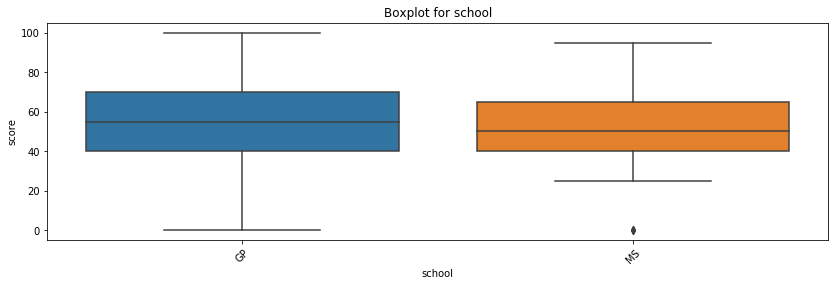

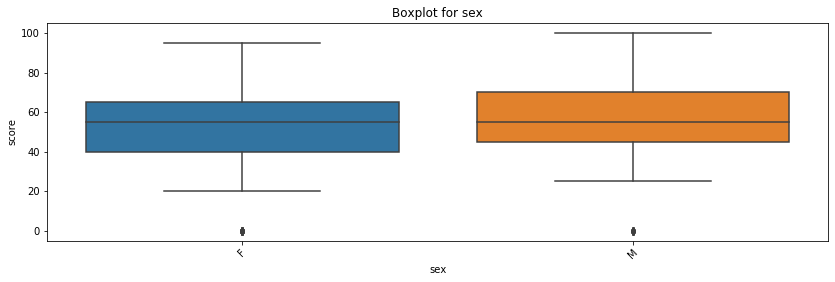

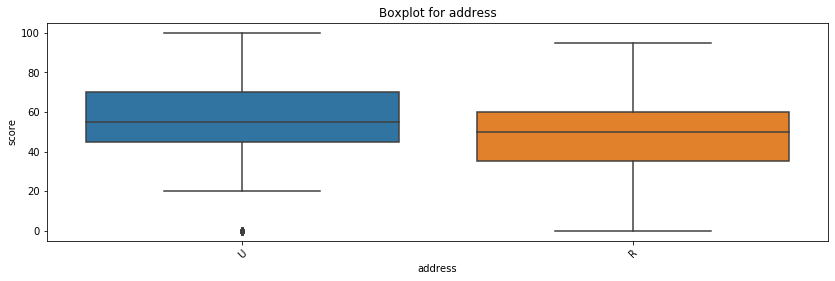

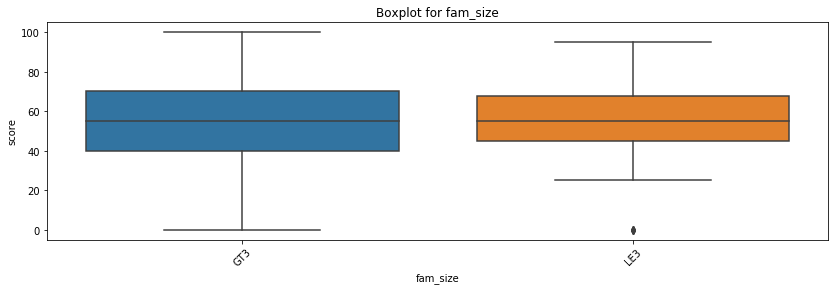

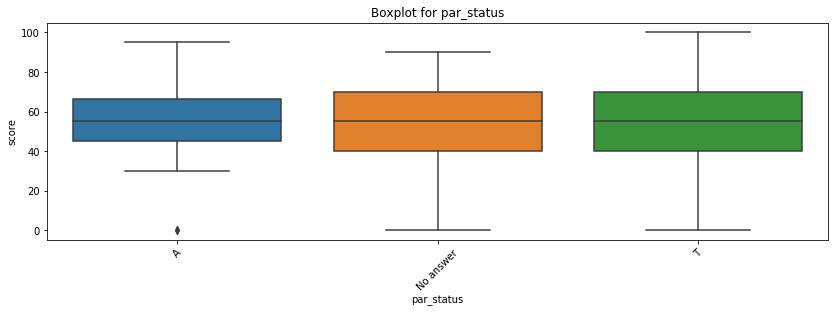

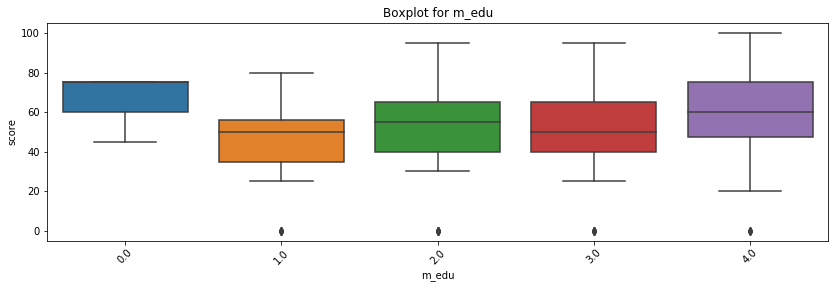

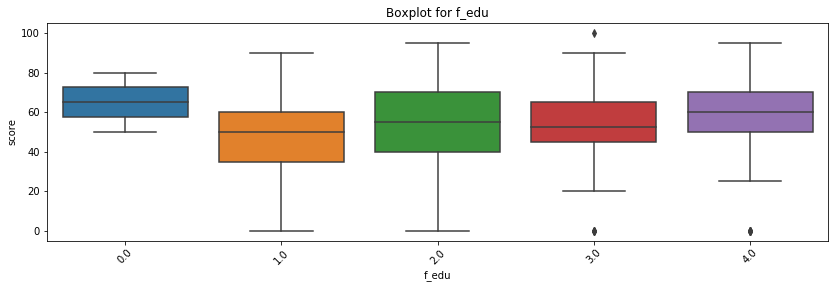

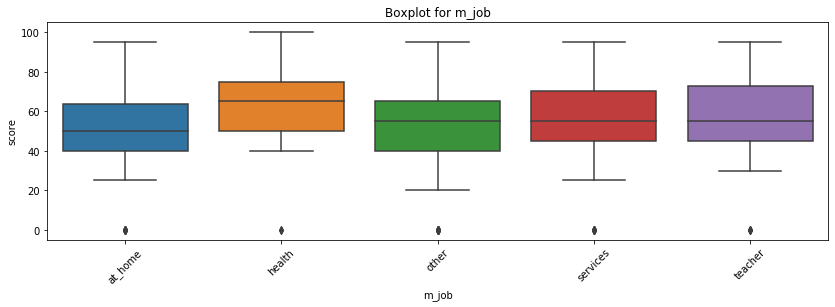

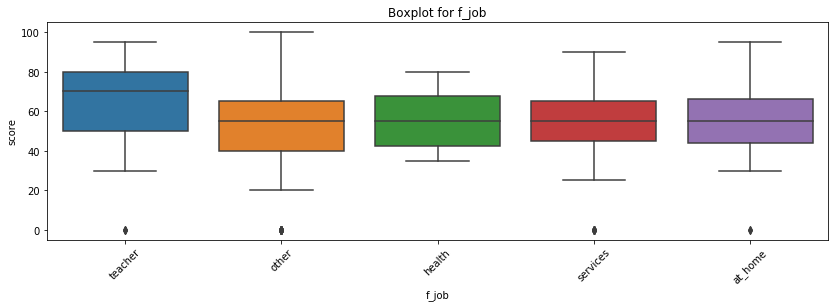

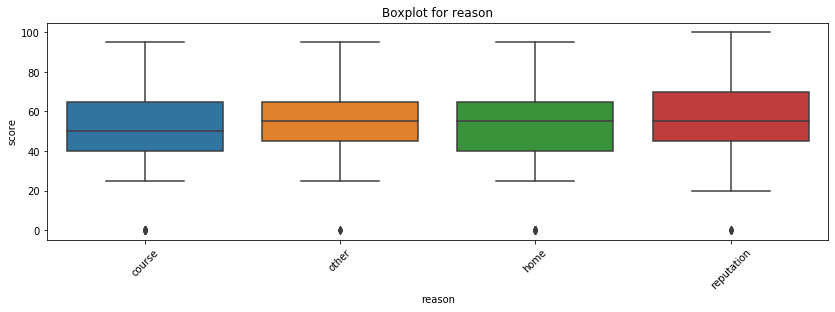

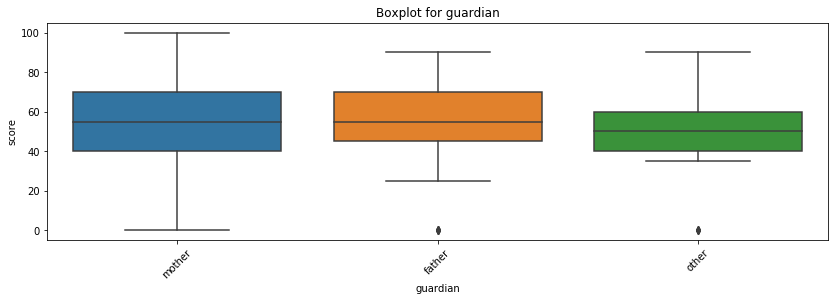

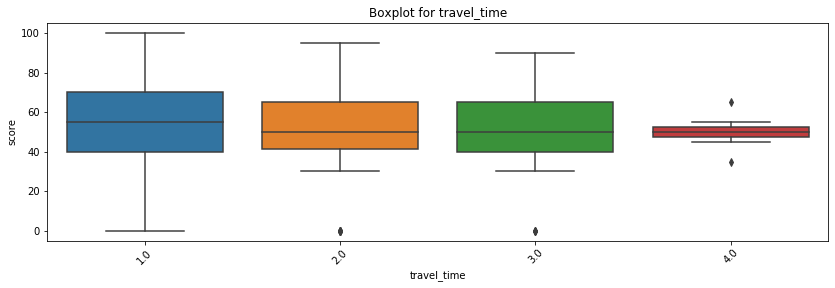

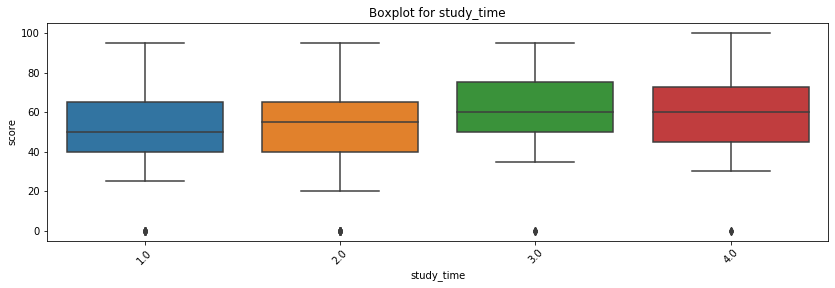

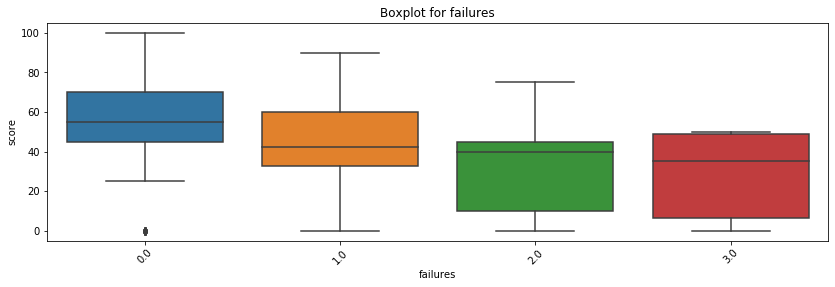

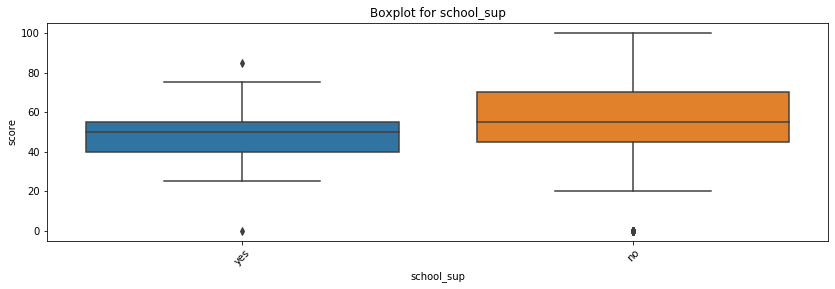

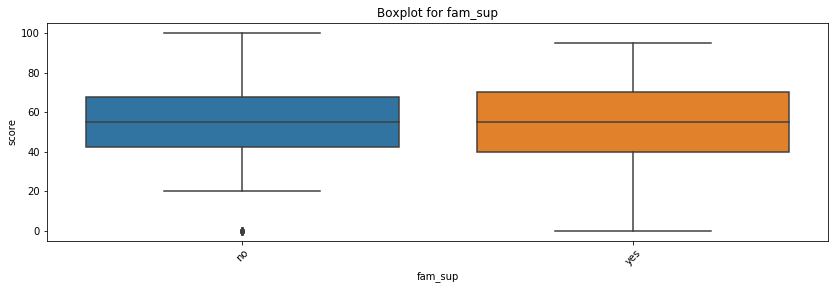

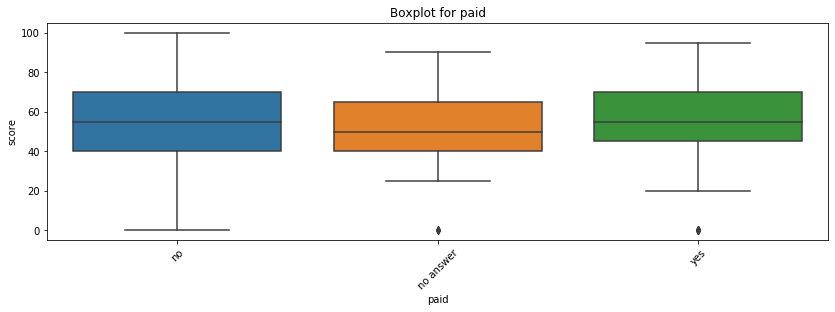

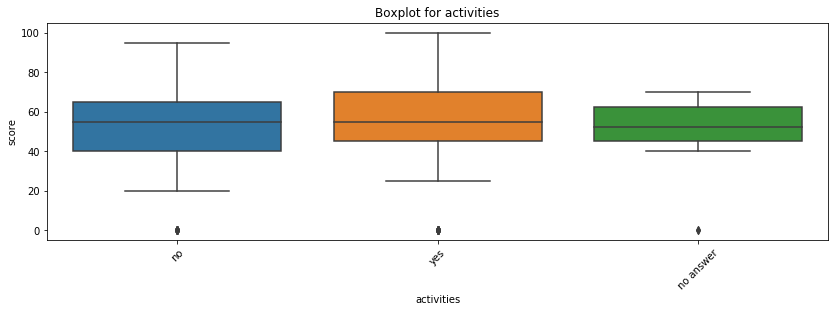

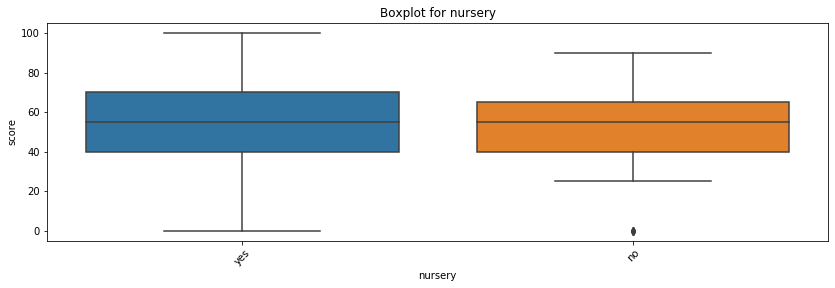

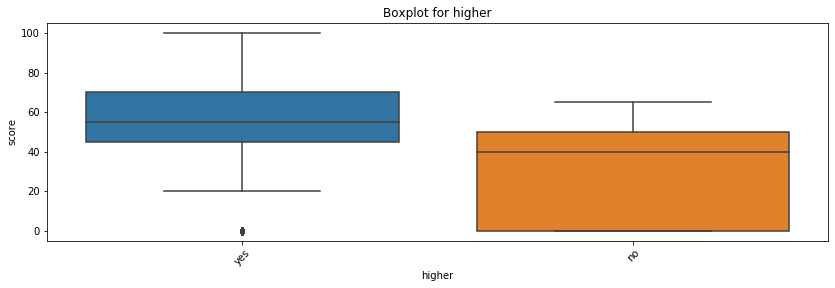

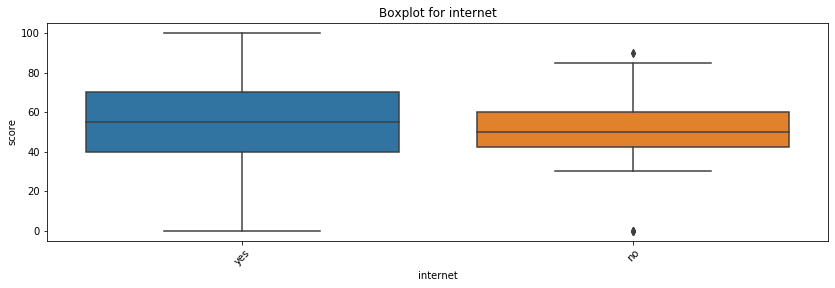

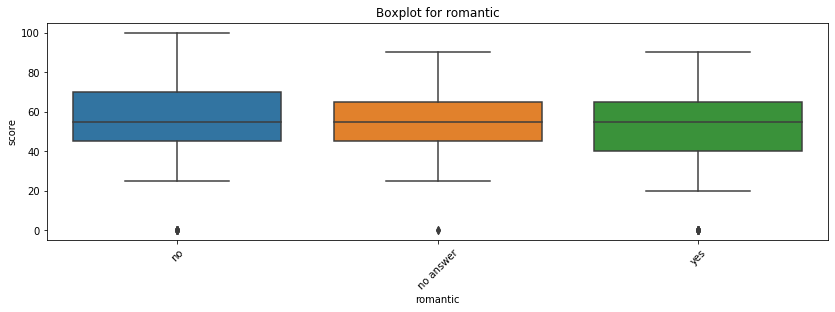

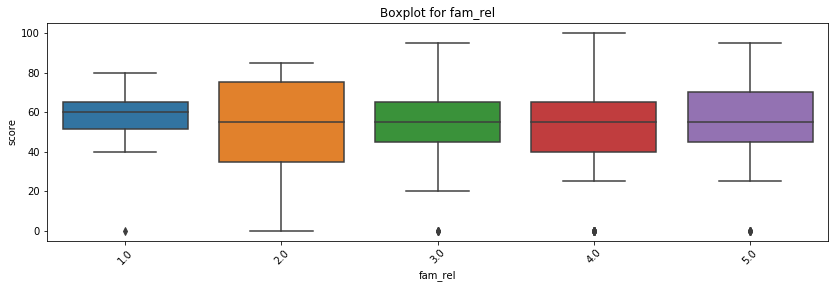

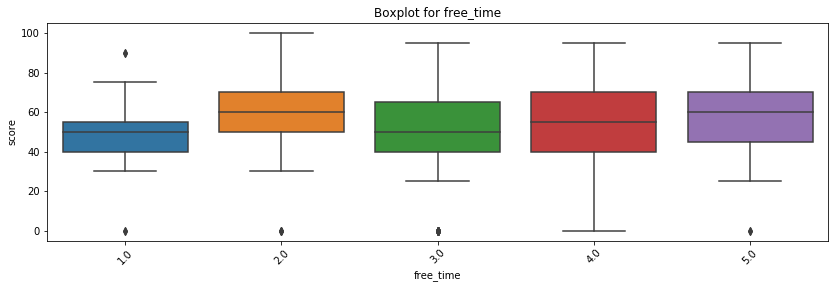

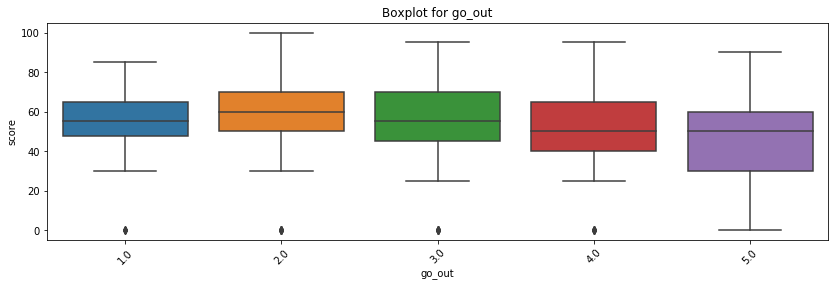

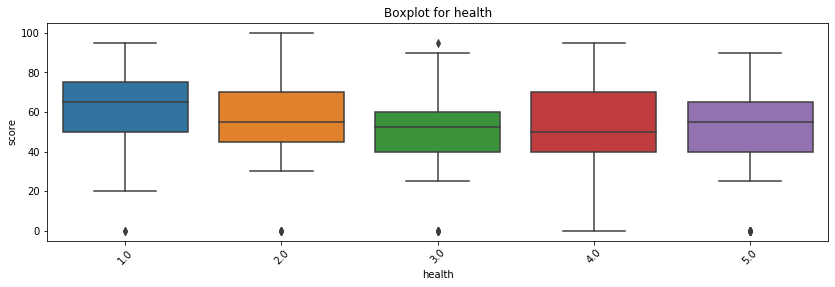

In [75]:
for col in ['school', 'sex', 'address', 'fam_size', 'par_status', 'm_edu', 'f_edu',
       'm_job', 'f_job', 'reason', 'guardian', 'travel_time', 'study_time',
       'failures', 'school_sup', 'fam_sup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'fam_rel',
       'free_time', 'go_out', 'health']:
    get_boxplot(col)

По графикам похоже, что далеко не все параметры могут влиять на оценку на экзамене.  
Проведеме тест Стьюдента.

In [89]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [90]:
for col in ['school', 'sex', 'address', 'fam_size', 'par_status', 'm_edu', 'f_edu',
       'm_job', 'f_job', 'reason', 'guardian', 'travel_time', 'study_time',
       'failures', 'school_sup', 'fam_sup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'fam_rel',
       'free_time', 'go_out', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки m_edu
Найдены статистически значимые различия для колонки m_job
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Указанные переменные имеют влияние на успеваемость по математике.

# Выводы

# цели и задачи проекта  
отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска. Выявить основные условия, которые влияют на успеваемость по математике

# поэтапное описание работы  
1.Рассмотрение всего файла целиком для понимания:  
1.1. количества факторов, их вид  
1.2. нахождение пустых строк, дубликатов  
2.Рассмотрение каждого столбца в отдельности  
2.1. анализ распределения данных  
2.2. замена пустот на подходящие данные/ удаление данных  
2.3. смена типа данных логически  
3.проведение корреляционного анализа между числовыми данными  
4.проведение анализа номинативных переменных   
4.1. графическим способом  
4.2. тест Стьюдента  
5.подбор переменных, которые влияют на успеваемость по математике  

# промежуточные выводы  
После рассмотрения каждого столбца есть промежуточные выводы, например:  
1.Почти в каждом столбце есть пустые строки  
2.Часть этих строк можно логически перевести в один из существующих вариантов ответа (например по работе матери или отца)  
3.Часть этих строк на данном этапе нет возможности дозаполнить  
4.Столбец study_time_granular оказался дублирующим с study_time. Удалили его  
5.всего из 29 столбцов с данными только 8 оказывают влияние на успеваемость по обучению  
6.Ошибки заполнения встречались, но не часто  
7.Выбросы обозначились только в столбце absences  
8.Корреляция между числовыми переменными не обнаружена, либо слабая

# основные итоги работы  
переменные, которые влияют на успеваемость по математике:  
address  
m_edu  
m_job  
failures  
higher  
romantic  
age  
absences  
Эти переменные войдут в модель для дальнейшего анализа успеваемости по математике